In [1]:
# Standard imports
import cv2 as cv
import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Setting up capture
path = '/Users/gert-janboth/Documents/flyTracker/data/movies/16arena_dots.h264'
cap = cv.VideoCapture(path)

In [3]:
# some properties of video
length = 1000#cap.get(cv.CAP_PROP_FRAME_COUNT) # works only on mp4's
width  = cap.get(cv.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv.CAP_PROP_FRAME_HEIGHT)
fps    = cap.get(cv.CAP_PROP_FPS)

print(length, fps, width, height)

1000 25.0 1280.0 1080.0


In [4]:
# Getting all frames into a numpy array for easy working
movie = []
for _ in np.arange(length):
    #frame_grayscale = cv.cvtColor(cap.read()[1], cv.COLOR_BGR2GRAY)
    movie.append(cap.read()[1]) 

In [5]:
frame = 99
frame_grayscale = cv.cvtColor(movie[frame], cv.COLOR_BGR2GRAY)
'''
frame_grayscale[:200, :300] = 255 # upper left corner
frame_grayscale[-250:, :300] = 255 # lower left corner
frame_grayscale[-250:, -300:] = 255 # lower right corner
frame_grayscale[:200, -300:] = 255 # lower right corner

#any weird shit outside of the roi we remove as well
frame_grayscale[:70, :] = 255
frame_grayscale[-120:, :] = 255
frame_grayscale[:, :180] = 255
frame_grayscale[:, -200:] = 255
'''

'\nframe_grayscale[:200, :300] = 255 # upper left corner\nframe_grayscale[-250:, :300] = 255 # lower left corner\nframe_grayscale[-250:, -300:] = 255 # lower right corner\nframe_grayscale[:200, -300:] = 255 # lower right corner\n\n#any weird shit outside of the roi we remove as well\nframe_grayscale[:70, :] = 255\nframe_grayscale[-120:, :] = 255\nframe_grayscale[:, :180] = 255\nframe_grayscale[:, -200:] = 255\n'

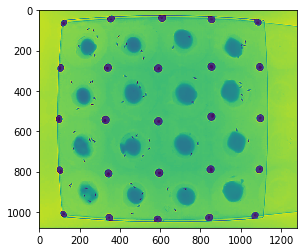

In [6]:
plt.imshow(frame_grayscale)

In [7]:
params = cv.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 20;
params.maxThreshold = 150;

# Filter by Area.
params.filterByArea = True
params.minArea = 15
params.maxArea = 60
params.minDistBetweenBlobs = 1.0

# Turn off other filters
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

# Set up the detector with default parameters.
detector = cv.SimpleBlobDetector_create(params)

In [8]:
%%time
n_flies = []
for frame in movie:
    frame_grayscale = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    '''
    frame_grayscale[:180, :300] = 255 # upper left corner
    frame_grayscale[-230:, :300] = 255 # lower left corner
    frame_grayscale[-230:, -300:] = 255 # lower right corner
    frame_grayscale[:180, -300:] = 255 # lower right corner

    #any weird shit outside of the roi we remove as well
    frame_grayscale[:70, :] = 255
    frame_grayscale[-120:, :] = 255
    frame_grayscale[:, :180] = 255
    frame_grayscale[:, -200:] = 255
    '''

    # Detect blobs.
    keypoints = detector.detect(frame_grayscale)
    n_flies.append(len(keypoints))


CPU times: user 13.8 s, sys: 1.52 s, total: 15.3 s
Wall time: 9.49 s


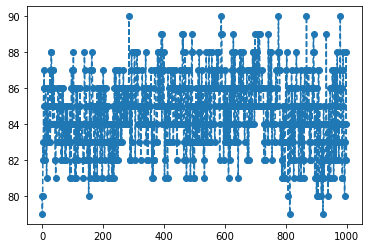

In [9]:
plt.plot(n_flies, 'o--')

(array([  3.,   9.,   0.,  50.,   0.,  82., 133.,   0., 194.,   0., 210.,
          0., 159.,  90.,   0.,  50.,   0.,  15.,   5.]),
 array([79.        , 79.57894737, 80.15789474, 80.73684211, 81.31578947,
        81.89473684, 82.47368421, 83.05263158, 83.63157895, 84.21052632,
        84.78947368, 85.36842105, 85.94736842, 86.52631579, 87.10526316,
        87.68421053, 88.26315789, 88.84210526, 89.42105263, 90.        ]),
 <a list of 19 Patch objects>)

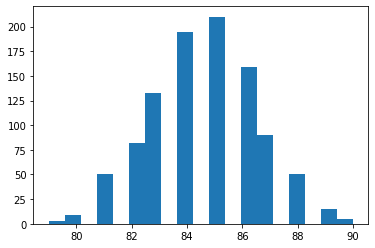

In [10]:
plt.hist(n_flies, bins='auto')

In [11]:
np.where(np.array(n_flies) == 39)

(array([], dtype=int64),)

In [12]:
frame = 99
frame_grayscale = cv.cvtColor(movie[frame], cv.COLOR_BGR2GRAY)
'''
frame_grayscale[:180, :300] = 255 # upper left corner
frame_grayscale[-230:, :300] = 255 # lower left corner
frame_grayscale[-230:, -300:] = 255 # lower right corner
frame_grayscale[:180, -300:] = 255 # lower right corner

#any weird shit outside of the roi we remove as well
frame_grayscale[:70, :] = 255
frame_grayscale[-120:, :] = 255
frame_grayscale[:, :180] = 255
frame_grayscale[:, -200:] = 255
'''

'\nframe_grayscale[:180, :300] = 255 # upper left corner\nframe_grayscale[-230:, :300] = 255 # lower left corner\nframe_grayscale[-230:, -300:] = 255 # lower right corner\nframe_grayscale[:180, -300:] = 255 # lower right corner\n\n#any weird shit outside of the roi we remove as well\nframe_grayscale[:70, :] = 255\nframe_grayscale[-120:, :] = 255\nframe_grayscale[:, :180] = 255\nframe_grayscale[:, -200:] = 255\n'

In [13]:
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
keypoints = detector.detect(frame_grayscale)
im_with_keypoints = cv.drawKeypoints(frame_grayscale, keypoints, np.array([]), (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


In [14]:
len(keypoints)

84

In [15]:
sizes = [keypaoint.size for keypoint in keypoints]

NameError: name 'keypaoint' is not defined

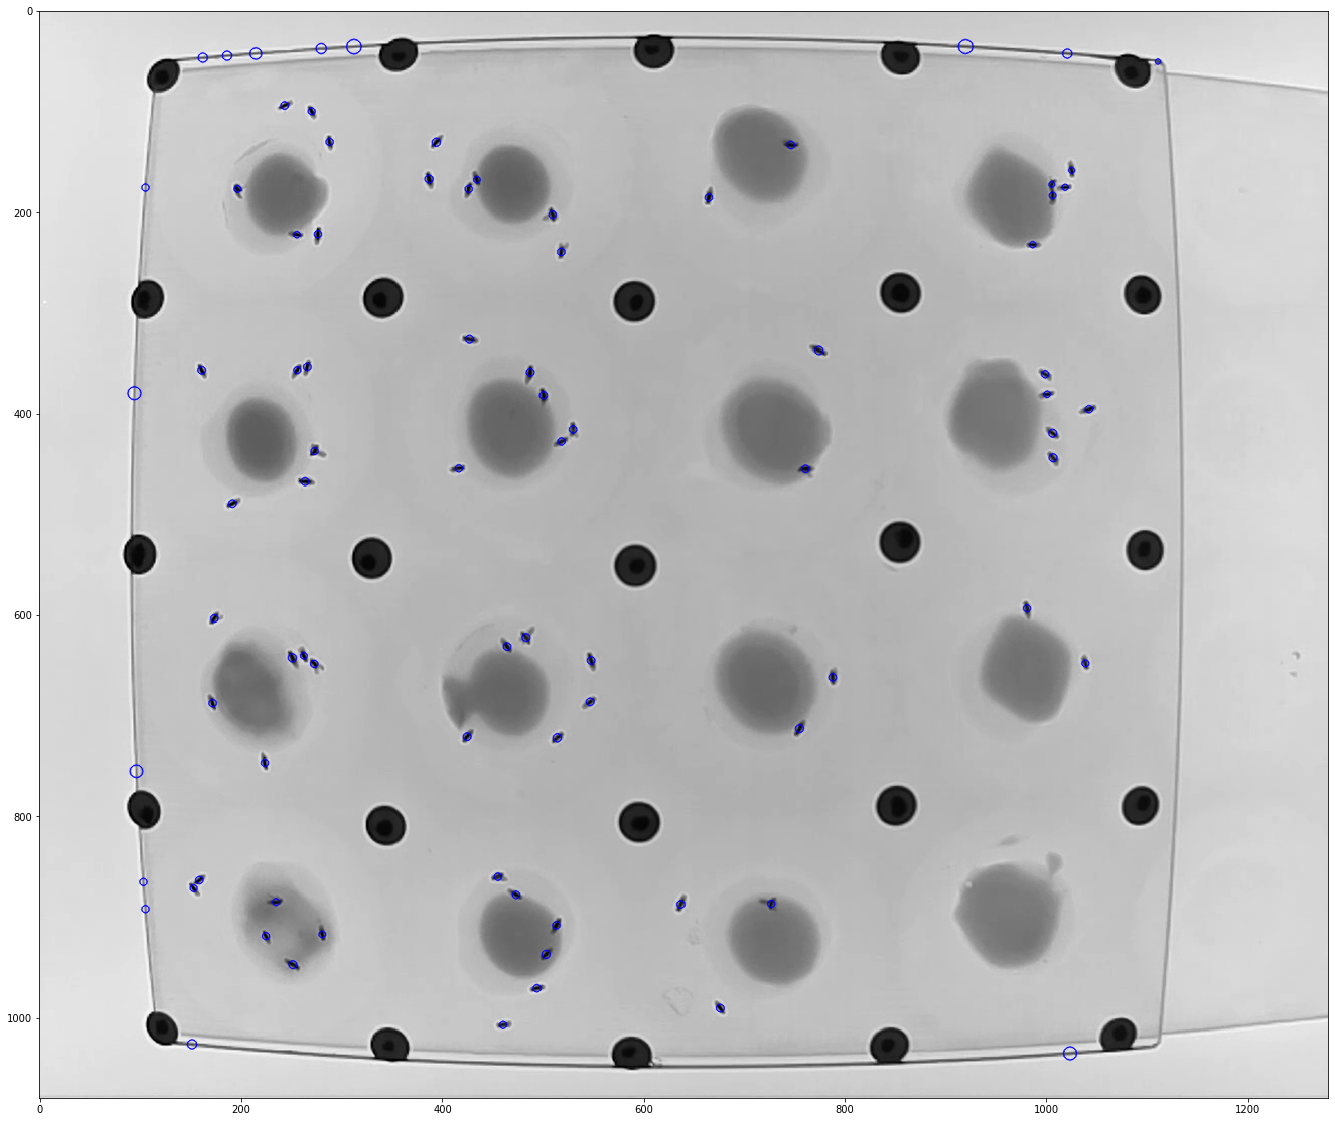

In [17]:
plt.figure(figsize=(30, 20))
plt.imshow(im_with_keypoints)

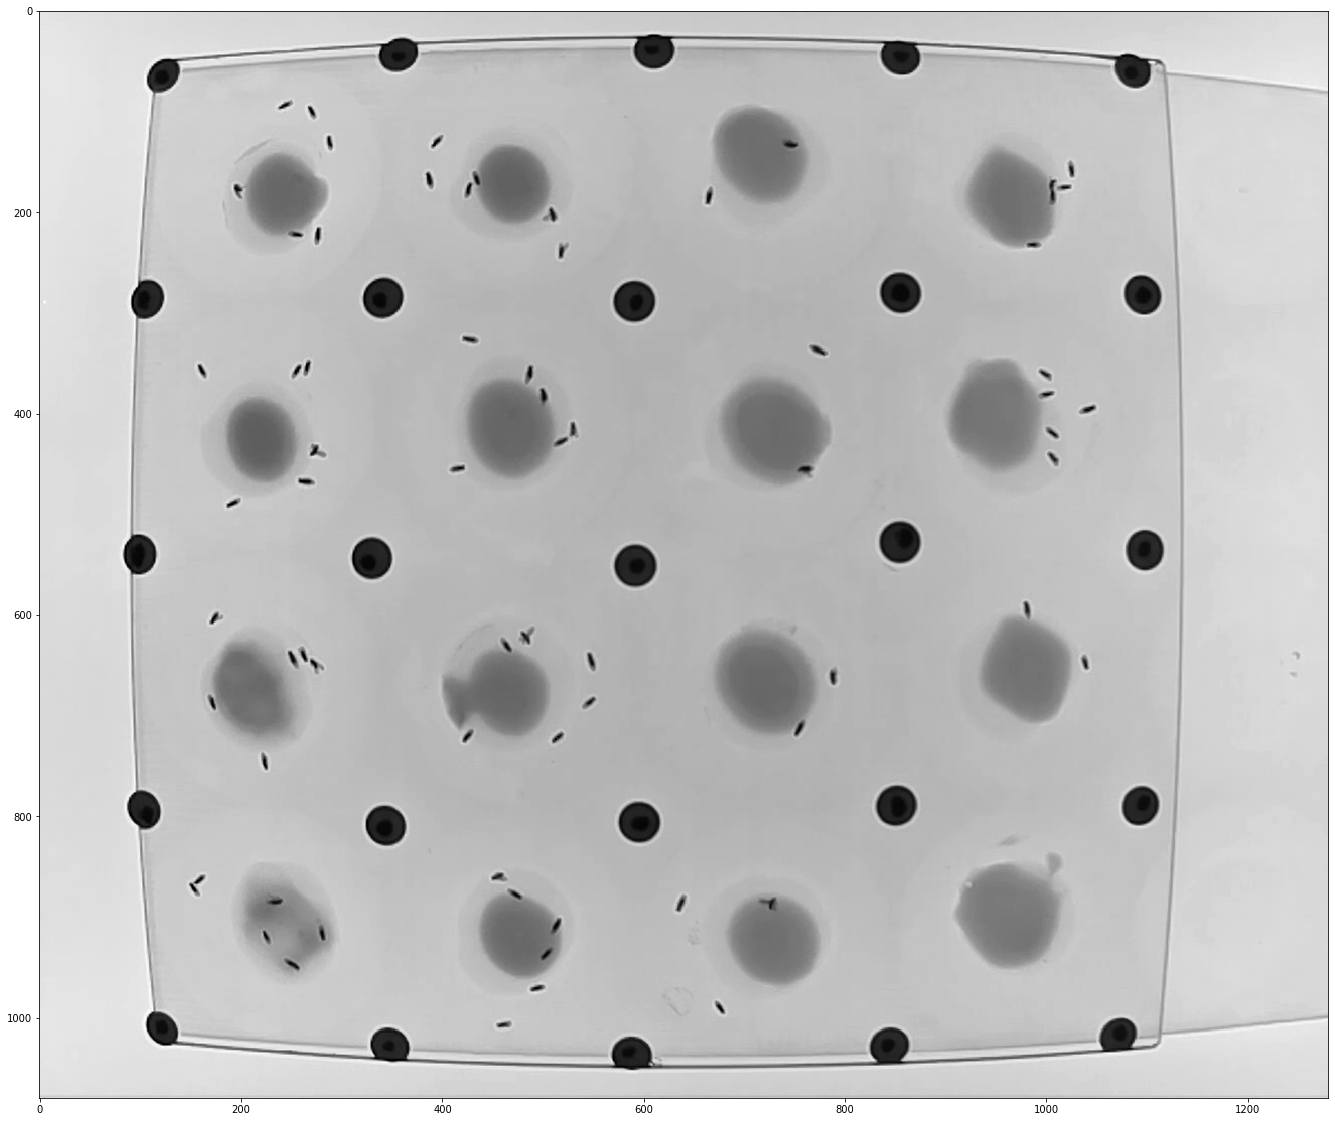

In [19]:
plt.figure(figsize=(30, 20))
plt.imshow(frame_grayscale, cmap='gray')

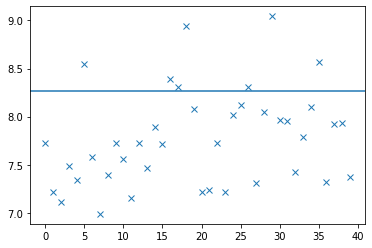

In [581]:
plt.plot(sizes, 'x')
plt.axhline(np.mean(sizes) + np.std(sizes))

In [582]:
np.unique(sizes).shape

(40,)

In [583]:
locs = np.array([keypoint.pt for keypoint in keypoints])

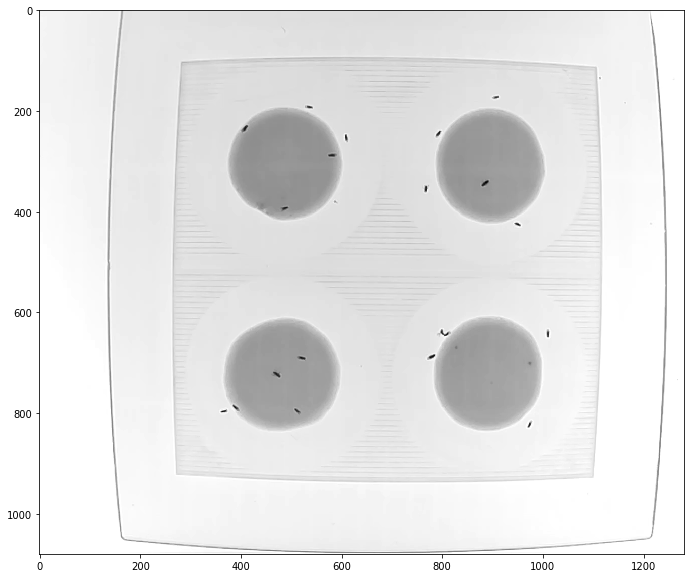

In [59]:
plt.figure(figsize=(20, 10))
#plt.scatter(locs[38, 0], locs[38, 1], s=5, c='red')
#plt.scatter(locs[39, 0], locs[39, 1], s=5, c='blue')
plt.imshow(frame_grayscale, cmap='gray')

#plt.ylim([0, 200])
#plt.xlim([200, 600])

In [585]:
locs[35:4, :]

array([], shape=(0, 2), dtype=float64)

In [586]:
keypoints[39].size

7.3732428550720215

In [560]:
keypoints[38].size

9.058379173278809

In [561]:
keypoints[39].pt

(406.9305419921875, 124.82943725585938)

In [562]:
keypoints[38].pt

(404.8687438964844, 127.09551239013672)

AttributeError: 'list' object has no attribute 'shape'

In [52]:
gray_movie = np.mean(np.stack([cv.cvtColor(frame, cv.COLOR_BGR2GRAY) for frame in movie], axis=-1), axis=-1)

In [55]:
gray_movie.shape

(1080, 1280)

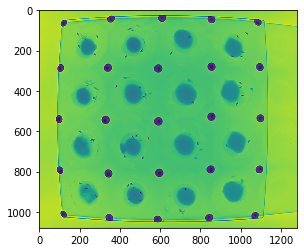

In [56]:
plt.imshow(gray_movie)